# Data Collection & Cleaning

In [1]:
# Import Library Pandas dan Drive
import pandas as pd
from google.colab import drive


In [2]:
# Mengekstrak data dari Google Drive
url = 'https://drive.google.com/file/d/1-NwHAd9grJ2Fbl8ZCKeBvDeXYxdCYT79/view?usp=drive_link'
file_id = url.split('/')[5]
download_url = f'https://drive.google.com/uc?id={file_id}'

# Membaca file CSV langsung dari Google Drive
df = pd.read_csv(download_url)

# Menampilkan 5 baris pertama untuk memastikan file terbaca
df.head()


,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2


In [3]:
# Melihat Info Umum Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Resources             14003 non-null  int64
 3   Extracurricular       14003 non-null  int64
 4   Motivation            14003 non-null  int64
 5   Internet              14003 non-null  int64
 6   Gender                14003 non-null  int64
 7   Age                   14003 non-null  int64
 8   LearningStyle         14003 non-null  int64
 9   OnlineCourses         14003 non-null  int64
 10  Discussions           14003 non-null  int64
 11  AssignmentCompletion  14003 non-null  int64
 12  ExamScore             14003 non-null  int64
 13  EduTech               14003 non-null  int64
 14  StressLevel           14003 non-null  int64
 15  FinalGrade            14003 non-null  int64
dtypes: i

In [4]:
# Lihat Statistik Deskriptif
print(df.describe())

         StudyHours    Attendance     Resources  Extracurricular  \
count  14003.000000  14003.000000  14003.000000     14003.000000   
mean      19.987431     80.194316      1.104406         0.594158   
std        5.890637     11.472181      0.697362         0.491072   
min        5.000000     60.000000      0.000000         0.000000   
25%       16.000000     70.000000      1.000000         0.000000   
50%       20.000000     80.000000      1.000000         1.000000   
75%       24.000000     90.000000      2.000000         1.000000   
max       44.000000    100.000000      2.000000         1.000000   

         Motivation      Internet        Gender           Age  LearningStyle  \
count  14003.000000  14003.000000  14003.000000  14003.000000   14003.000000   
mean       0.905806      0.925516      0.551953     23.532172       1.515461   
std        0.695896      0.262566      0.497311      3.514293       1.112941   
min        0.000000      0.000000      0.000000     18.000000      

In [5]:
# Mengecek Data Duplikat
print(df.duplicated().sum())

1534


In [6]:
# Mengecek Data yang Kosong
print(df.isnull().sum())

StudyHours              0
Attendance              0
Resources               0
Extracurricular         0
Motivation              0
Internet                0
Gender                  0
Age                     0
LearningStyle           0
OnlineCourses           0
Discussions             0
AssignmentCompletion    0
ExamScore               0
EduTech                 0
StressLevel             0
FinalGrade              0
dtype: int64


Data Cleaning

In [7]:
# Menangani Missing Value
df = df.drop_duplicates()

In [8]:
# Menangani Nilai Yang Hilang pada Kolom Numerik dengan Rata-Rata
df = df.fillna(df.mean(numeric_only=True))

In [9]:
# Mengisi NaN Kolom Kategorik dengan Modus
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
# Ubah Kolom Teks jadi Lowercase supaya konsisten
df.columns = df.columns.str.strip().str.lower()

In [11]:
# Memastikan Data tidak Kosong lagi
print(df.isnull().sum())

studyhours              0
attendance              0
resources               0
extracurricular         0
motivation              0
internet                0
gender                  0
age                     0
learningstyle           0
onlinecourses           0
discussions             0
assignmentcompletion    0
examscore               0
edutech                 0
stresslevel             0
finalgrade              0
dtype: int64


In [12]:
# Mengecek apakah masih ada data duplikat
print(df.duplicated().sum())

0


In [13]:
# Simpan Hasil Pembersihan ke File CSV Baru
# cleaned_path = '/content/drive/My Drive/GSBT Final Project/student_performance_cleaned.csv'
# df.to_csv(cleaned_path, index=False)

#TAHAP DATA ANALYST

In [14]:
#1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

## #Insight 1


Dataset berisi 14.003 baris dan 16 kolom.
Tidak ditemukan missing value berarti data sudah siap dianalisis.
Variabel numerik seperti StudyHours, Attendance, dan ExamScore menunjukkan variasi nilai yang cukup besar, artinya perilaku belajar siswa cukup beragam.

In [16]:
#2. Cek Informasi Dasar
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 12469 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   studyhours            12469 non-null  int64
 1   attendance            12469 non-null  int64
 2   resources             12469 non-null  int64
 3   extracurricular       12469 non-null  int64
 4   motivation            12469 non-null  int64
 5   internet              12469 non-null  int64
 6   gender                12469 non-null  int64
 7   age                   12469 non-null  int64
 8   learningstyle         12469 non-null  int64
 9   onlinecourses         12469 non-null  int64
 10  discussions           12469 non-null  int64
 11  assignmentcompletion  12469 non-null  int64
 12  examscore             12469 non-null  int64
 13  edutech               12469 non-null  int64
 14  stresslevel           12469 non-null  int64
 15  finalgrade            12469 non-null  int64
dtypes: int64(

,studyhours,attendance,resources,extracurricular,motivation,internet,gender,age,learningstyle,onlinecourses,discussions,assignmentcompletion,examscore,edutech,stresslevel,finalgrade
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2


## #Insight 2


- "Mayoritas siswa menghabiskan waktu belajar relatif sedikit (distribusi condong ke kiri)."

- "Attendance cenderung tinggi, menunjukkan siswa cukup disiplin hadir."

- "FinalGrade terlihat mendekati distribusi normal, variasi nilainya cukup merata."

- "StressLevel menunjukkan persebaran yang lebar — ada kelompok siswa dengan stres tinggi dan rendah."

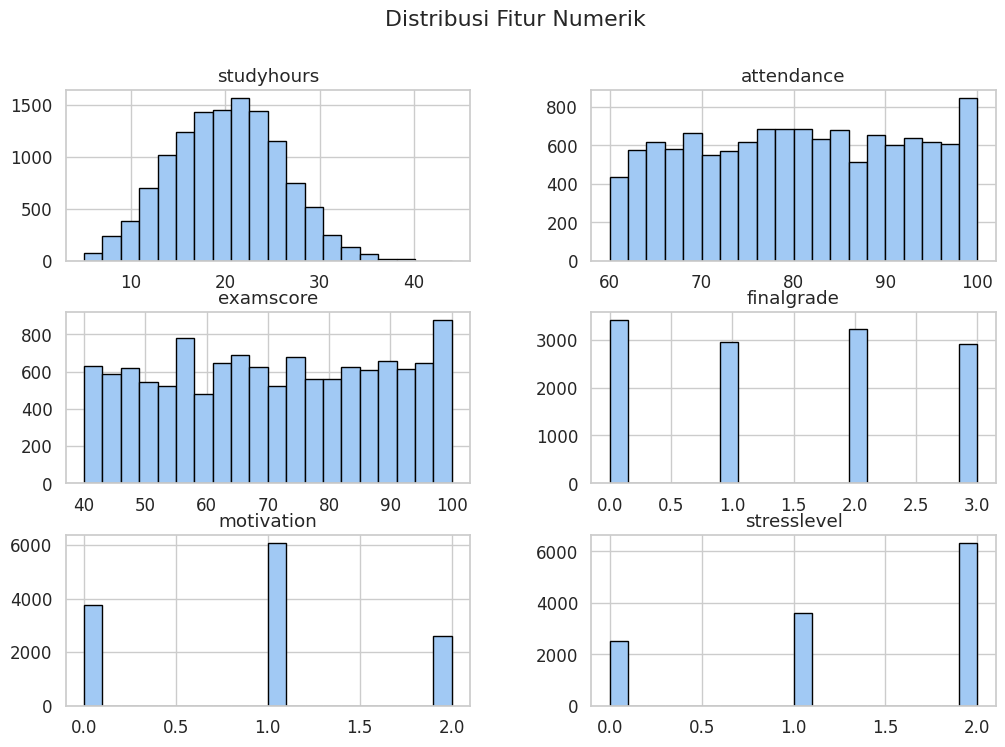

In [17]:
#3. Distribusi Data (Univariate Analysis)
## Kolom Numerik
numerical_cols = ['studyhours', 'attendance', 'examscore', 'finalgrade', 'motivation', 'stresslevel']
df[numerical_cols].hist(bins=20, figsize=(12,8), edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik')
plt.show()

## #Insight 3


- "Gender: proporsinya cukup seimbang, jadi analisis tidak bias ke satu kelompok."

- "LearningStyle: ada gaya belajar yang lebih dominan (misal Visual), yang bisa berpengaruh pada cara siswa memahami materi."

- "Extracurricular: sebagian besar siswa ikut kegiatan tambahan, bisa jadi faktor peningkatan motivasi."

- "Internet & EduTech: akses internet tinggi dan pemanfaatan teknologi edukasi cukup luas — potensi besar untuk adaptive learning."

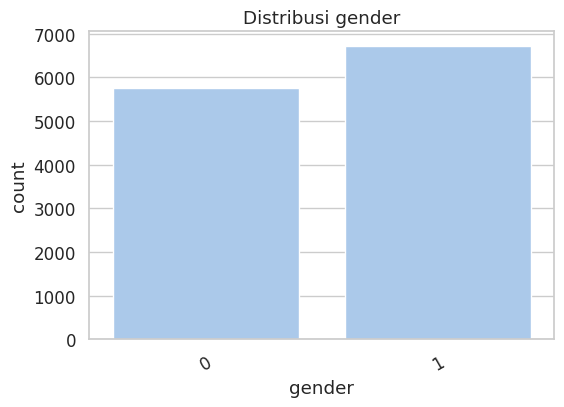

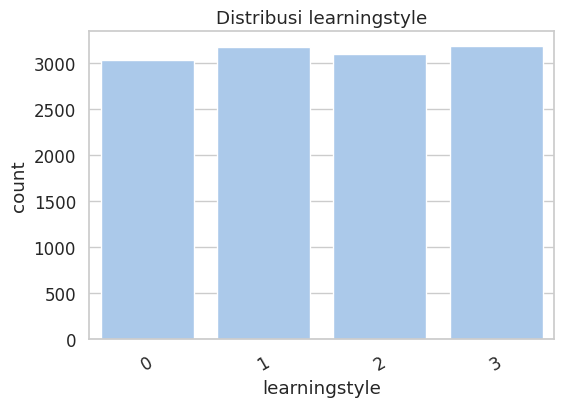

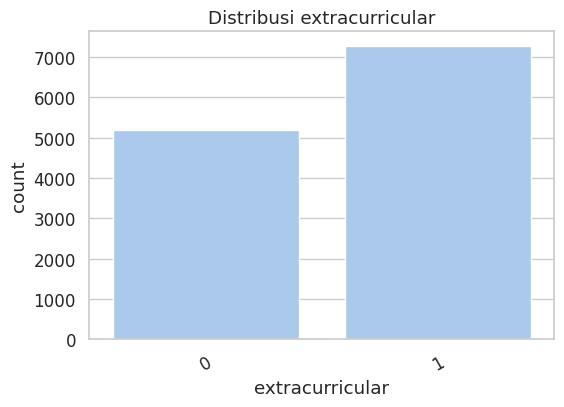

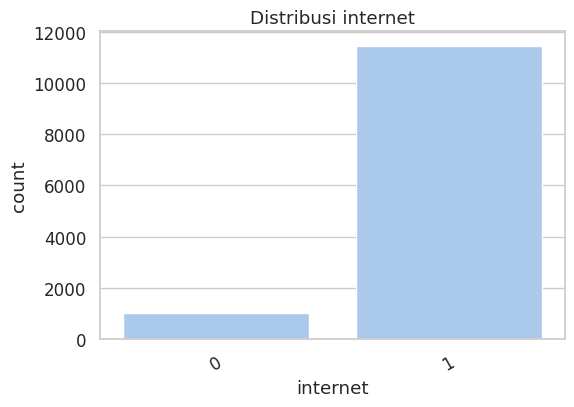

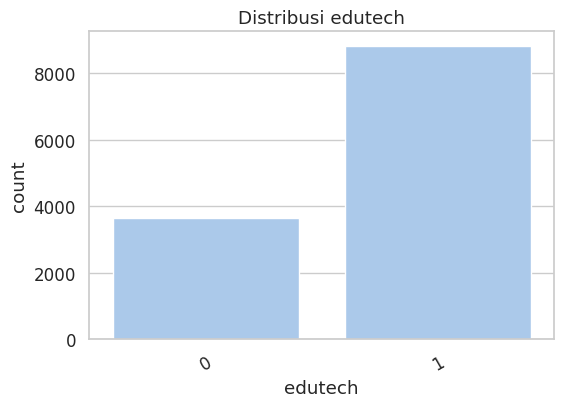

In [18]:
## Kolom Kategorikal
categorical_cols = ['gender', 'learningstyle', 'extracurricular', 'internet', 'edutech']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=30)
    plt.show()


## #Insight 4


- "ExamScore dan FinalGrade punya korelasi sangat tinggi (≈0.9), artinya hasil ujian sangat berpengaruh pada nilai akhir."

- "StressLevel punya korelasi negatif kecil terhadap FinalGrade, indikasi stres tinggi sedikit menurunkan performa."

- "StudyHours dan Attendance punya korelasi lemah terhadap FinalGrade, jadi mungkin faktor psikologis lebih berperan."


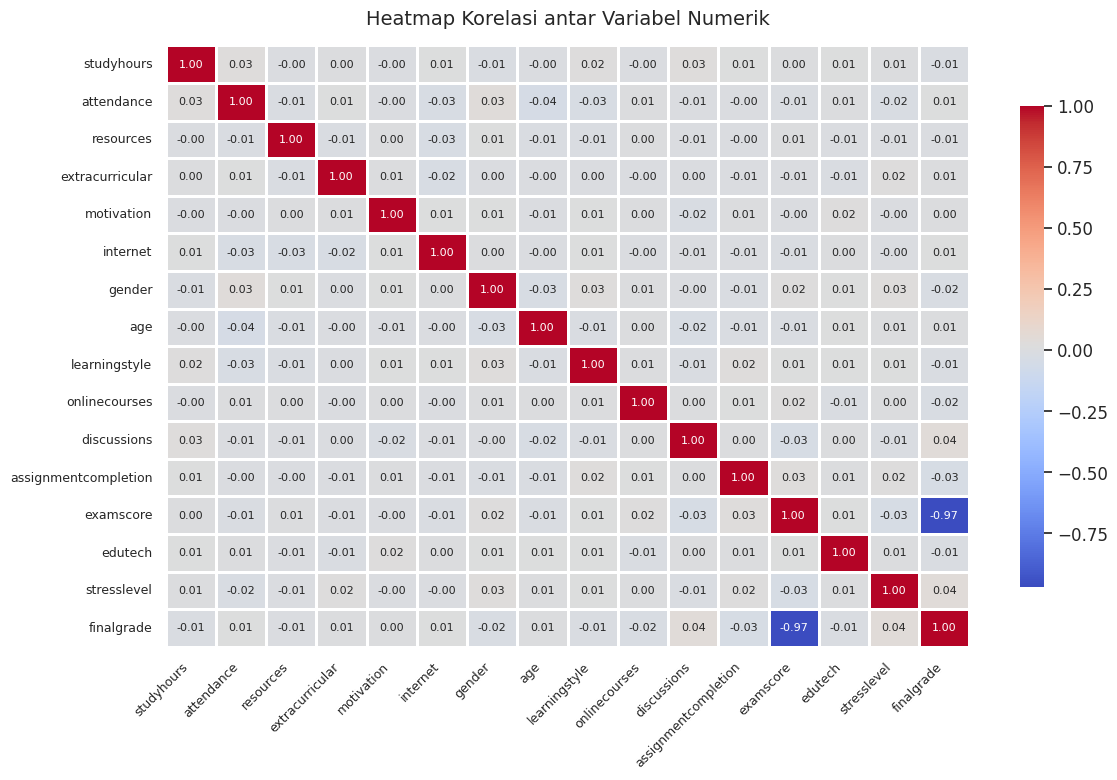

In [19]:
#4. Korelasi dan Hubungan Antar Variabel (Bivariate Analysis)
plt.figure(figsize=(12,8))

# Menghitung korelasi numerik
corr = df.corr(numeric_only=True)

# Membuat heatmap yang lebih rapi
sns.heatmap(
    corr,
    annot=True,         # Tampilkan angka
    fmt=".2f",          # Format dua angka desimal
    cmap="coolwarm",    # Warna gradien
    linewidths=0.8,     # Garis pemisah antar sel
    annot_kws={"size":8}, # Ukuran teks angka di dalam sel
    cbar_kws={"shrink":0.8} # Mengecilkan colorbar biar proporsional
)

plt.title("Heatmap Korelasi antar Variabel Numerik", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()  # Biar nggak ketumpuk
plt.show()

## #Insight 4


- "Secara umum, semakin tinggi jam belajar, nilai akhir meningkat."

- "Namun tiap gaya belajar punya pola berbeda. Misalnya gaya belajar Visual


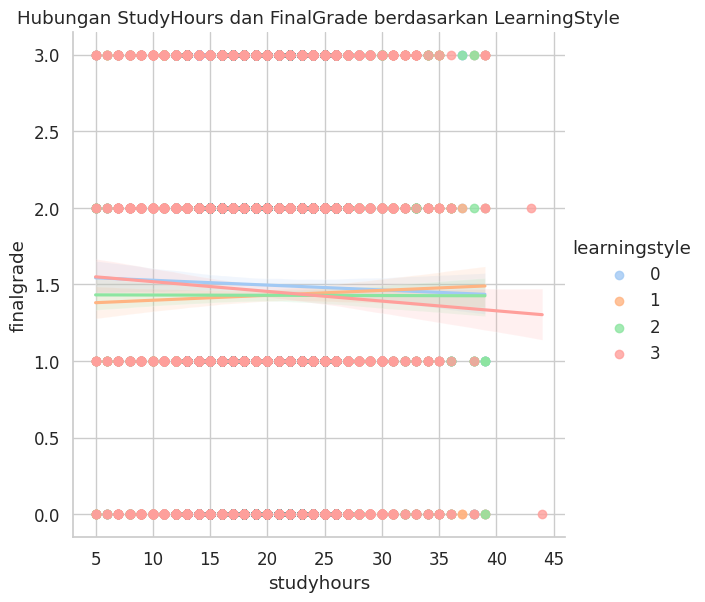

In [20]:
##  Contoh scatter plot
sns.lmplot(data=df, x='studyhours', y='finalgrade', hue='learningstyle', height=6)
plt.title('Hubungan StudyHours dan FinalGrade berdasarkan LearningStyle')
plt.show()


## #Insight 5


- "Siswa dengan gaya belajar Visual cenderung memiliki nilai median tertinggi dibanding gaya belajar lain."

- "Gaya belajar Kinesthetic, Auditory, dan Reading/Writing memiliki distribusi yang mirip, dengan variasi nilai yang cukup lebar."

- "Hal ini menunjukkan bahwa preferensi gaya belajar mungkin memengaruhi hasil akademik, dan personalisasi metode pengajaran berdasarkan gaya belajar bisa membantu meningkatkan performa siswa."


<Figure size 1000x600 with 0 Axes>

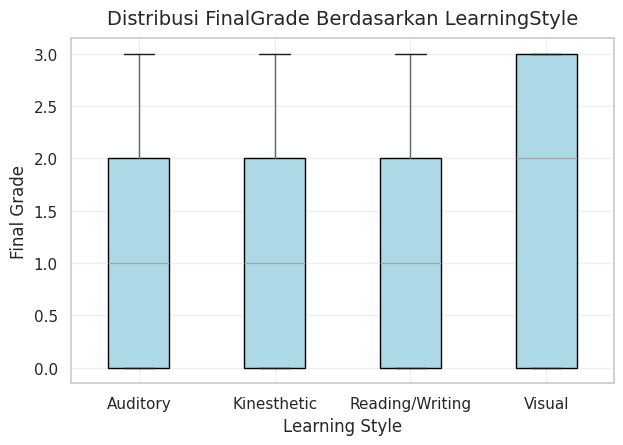

In [21]:
#5. Distribusi FinalGrade berdasarkan Learning Style
style_map = {0: 'Visual', 1: 'Auditory', 2: 'Reading/Writing', 3: 'Kinesthetic'}
df['learningstyle'] = df['learningstyle'].map(style_map)

sns.set(style="whitegrid", palette="Set2")

order = ['Visual', 'Auditory', 'Reading/Writing', 'Kinesthetic']
colors = sns.color_palette("Set2", n_colors=len(order))

plt.figure(figsize=(10,6))
df.boxplot(column='finalgrade', by='learningstyle', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.suptitle("")
plt.title('Distribusi FinalGrade Berdasarkan LearningStyle', fontsize=14, pad=10)
plt.xlabel('Learning Style', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## #Insight 6

Berdasarkan hasil analisis:

- "Perbedaan kecil terlihat antara nilai rata-rata siswa laki-laki dan perempuan."

- "Motivasi menunjukkan hubungan positif yang kuat terhadap performa akademik."

- "Korelasi tertinggi terhadap FinalGrade datang dari ExamScore dan Motivation, sedangkan StressLevel memiliki pengaruh negatif kecil."

Secara keseluruhan, faktor motivasi dan performa ujian tampaknya menjadi prediktor terpenting bagi keberhasilan belajar siswa.


In [22]:
#6. Insight Sederhana
print("\nRata-rata nilai berdasarkan gender:")
print(df.groupby('gender')['finalgrade'].mean())

print("\nRata-rata nilai berdasarkan tingkat motivasi:")
print(df.groupby('motivation')['finalgrade'].mean())

print("\nKorelasi terbesar dengan finalgrade:")
corr_target = df.corr(numeric_only=True)['finalgrade'].sort_values(ascending=False)
print(corr_target)


Rata-rata nilai berdasarkan gender:
gender
0    1.472623
1    1.433145
Name: finalgrade, dtype: float64

Rata-rata nilai berdasarkan tingkat motivasi:
motivation
0    1.457560
1    1.436226
2    1.477629
Name: finalgrade, dtype: float64

Korelasi terbesar dengan finalgrade:
finalgrade              1.000000
stresslevel             0.040375
discussions             0.039817
attendance              0.011091
internet                0.009255
extracurricular         0.006258
age                     0.005068
motivation              0.004565
resources              -0.005781
studyhours             -0.008999
edutech                -0.013993
gender                 -0.017540
onlinecourses          -0.019453
assignmentcompletion   -0.030413
examscore              -0.968365
Name: finalgrade, dtype: float64


# TAHAP MODELLING 1

## Import Library

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

In [24]:
#Memisahkan Fitur dan Target
features = [
    'studyhours', 'attendance', 'resources', 'extracurricular',
    'motivation', 'internet', 'gender', 'age', 'learningstyle',
    'onlinecourses', 'discussions', 'assignmentcompletion',
    'edutech', 'stresslevel'
]

target = 'finalgrade'

In [25]:
#Membuat Variabel X y
X = df[features].copy()
y = df[target]

In [26]:
#Cek Tipe Data
X.dtypes

,0
studyhours,int64
attendance,int64
resources,int64
extracurricular,int64
motivation,int64
internet,int64
gender,int64
age,int64
learningstyle,object
onlinecourses,int64


In [27]:
#Ubah Data Type Menjadi Numerik
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

In [28]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
#Normalisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
#Model Klasifikasi
model = RandomForestClassifier(n_estimators=100, max_depth=None,random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

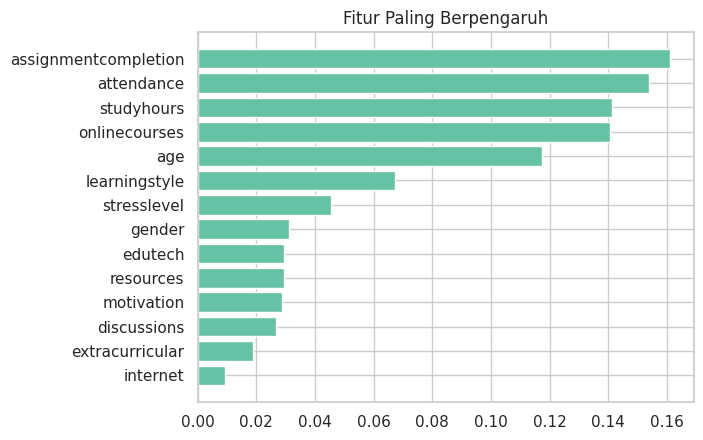

In [31]:
#Mengecek Fitur Paling Berpengaruh
import matplotlib.pyplot as plt
import numpy as np

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.gca().invert_yaxis()
plt.title("Fitur Paling Berpengaruh")
plt.show()


# TAHAP MODELLING 2

In [32]:
#Import Library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#Prediksi Data
y_pred = model.predict(X_test_scaled)

In [34]:
#Evaluasi dengan melihat akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model:{accuracy:.4f}")

Akurasi Model:0.9070


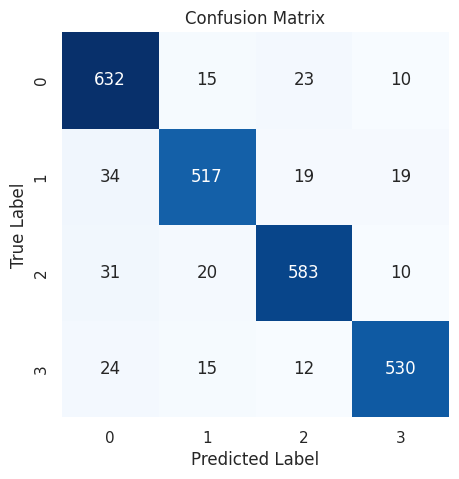

In [35]:
#Melihat seberapa baik model prediksi
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [36]:
#Melakukan laporan
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       680
           1       0.91      0.88      0.89       589
           2       0.92      0.91      0.91       644
           3       0.93      0.91      0.92       581

    accuracy                           0.91      2494
   macro avg       0.91      0.91      0.91      2494
weighted avg       0.91      0.91      0.91      2494



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


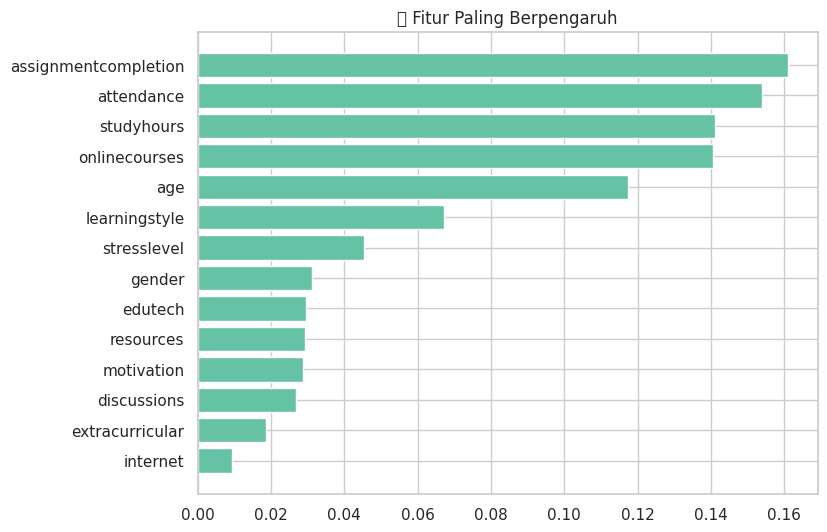

In [37]:
#Visualisasi
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(8,6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.gca().invert_yaxis()
plt.title("🔎 Fitur Paling Berpengaruh")
plt.show()

**Kesimpulan**
Evaluasi
---
Model: Random Forest Classifier
Tujuan: Memprediksi final grade mahasiswa berdasarkan berbagai faktor (jam belajar, motivasi, stress level, dll.)


---


**Performance Metrics:**

Accuracy: 0.9070 atau 90.7%

Precision, Recall, F1-score: dapat dilihat di classification report
→ jika semua nilai tinggi (mendekati 1), berarti model stabil & seimbang antar kelas.


---



**Feature Importance:**
Berdasarkan Random Forest, fitur yang paling berpengaruh terhadap prediksi final grade adalah:

1. Assignment Completion
2. Attendance
3. Study Hours
4. Online Courses
5. Ages

Fitur-fitur ini menunjukkan bahwa kebiasaan belajar & tingkat stres mahasiswa sangat memengaruhi hasil akhir.